When reading Raftery et al. (2012), we see that the case-control approximation method came from the need in epidemiology to analyze data from cases where the "case" that we are interested in is very rare - that is, there are many more instances of the "control". This leads to an assumption when implementing this work in network analysis that the adjacency matrix becomes sparser as the number of nodes in the network increases. This leads to a logical question with our dataset: does it actually fulfill this condition of sparsity in the Poisson case?

(of course, we can force it to fulfill a condition of sparsity when thresholding for the Bernoulli case, as the paper by Raftery et al. focused on just the Bernoulli case; it was published before Sewell and Chen published either of their dynamic Bernoulli or Poisson papers)

The work below shows that the matrix representing the directed, weighted country network is in fact not sparse and contains a likely outlier point in October 2021.

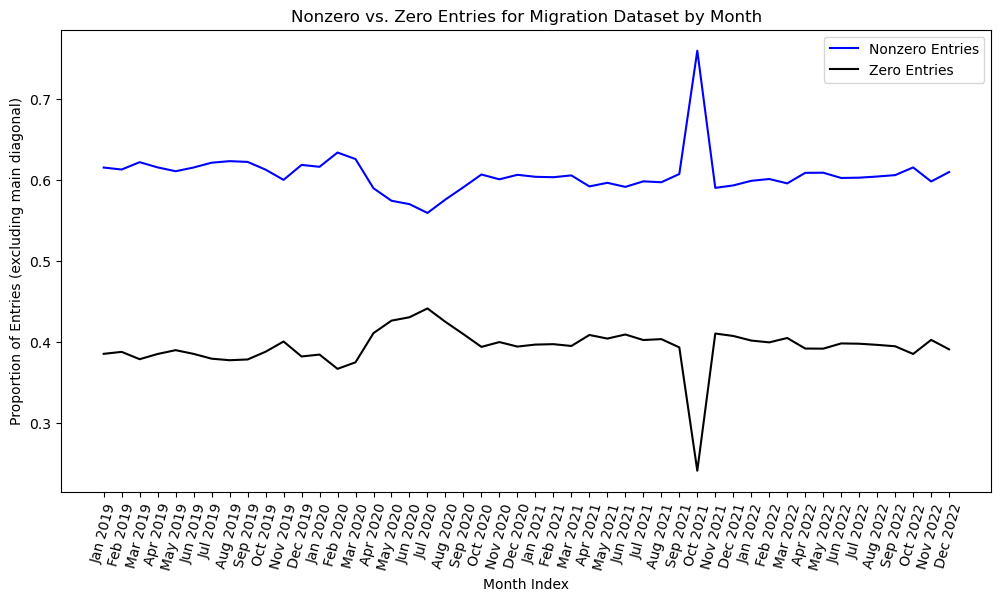

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

pathToNPYFile = os.path.join(os.getcwd(), "..", "migration_tensor.npy")
Y = np.load(pathToNPYFile)

zeroEntries = np.zeros(48)
nonzeroEntries = np.zeros(48)

for monthIndex in range(48):
    monthMatrix = Y[monthIndex]

    # Find the number of zero flows (subtracting 181 because no self-loops)
    zeroEntries[monthIndex] = (np.sum(monthMatrix == 0) - 181) / (181 * 180)
    # Find the number of nonzero entries
    nonzeroEntries[monthIndex] = np.count_nonzero(monthMatrix) / (181 * 180)

months = pd.date_range(start='2019-01-01', end='2022-12-01', freq='MS')
monthLabels = months.strftime('%b %Y')  # '{short month} {year}', etc.

plt.figure(figsize=(12, 6))
plt.plot(monthLabels, nonzeroEntries, label="Nonzero Entries", color="b")
plt.plot(monthLabels, zeroEntries, label="Zero Entries", color="k")
plt.xticks(rotation=75)
plt.xlabel("Month Index")
plt.ylabel("Proportion of Entries (excluding main diagonal)")
plt.title("Nonzero vs. Zero Entries for Migration Dataset by Month")
plt.legend()
plt.show()

How about only entries over a certain arbitrary number? What if there are a large proportion of edges with very small weights (representing small or less significant migration patterns) that we could zero-out to make the matrix sparse?

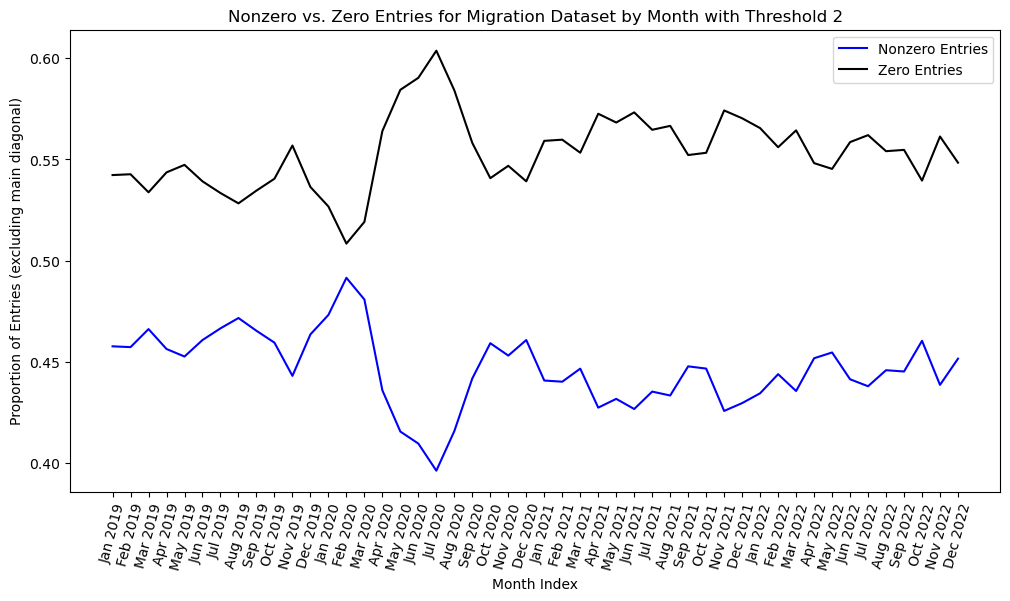

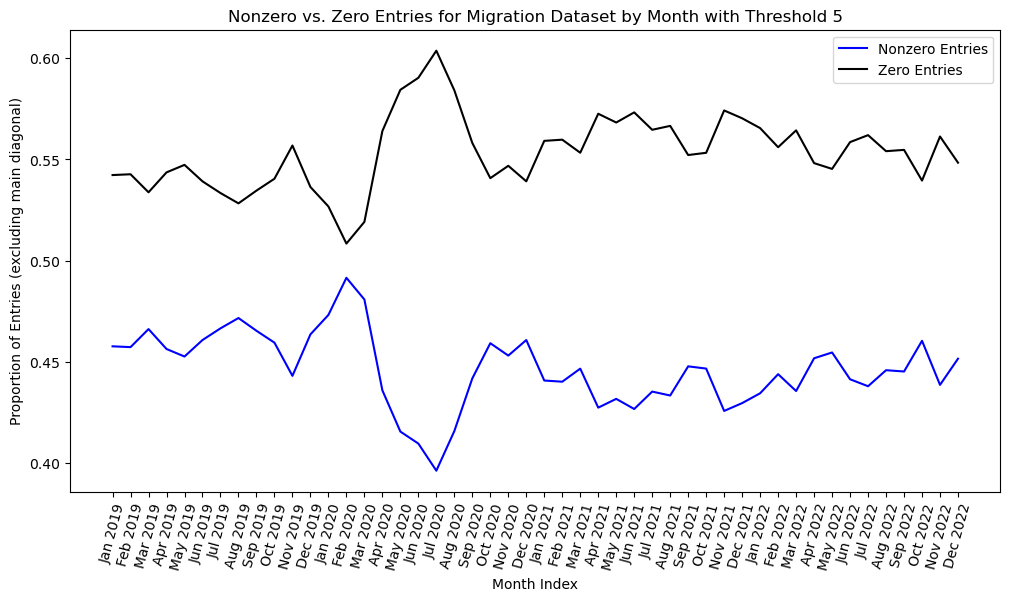

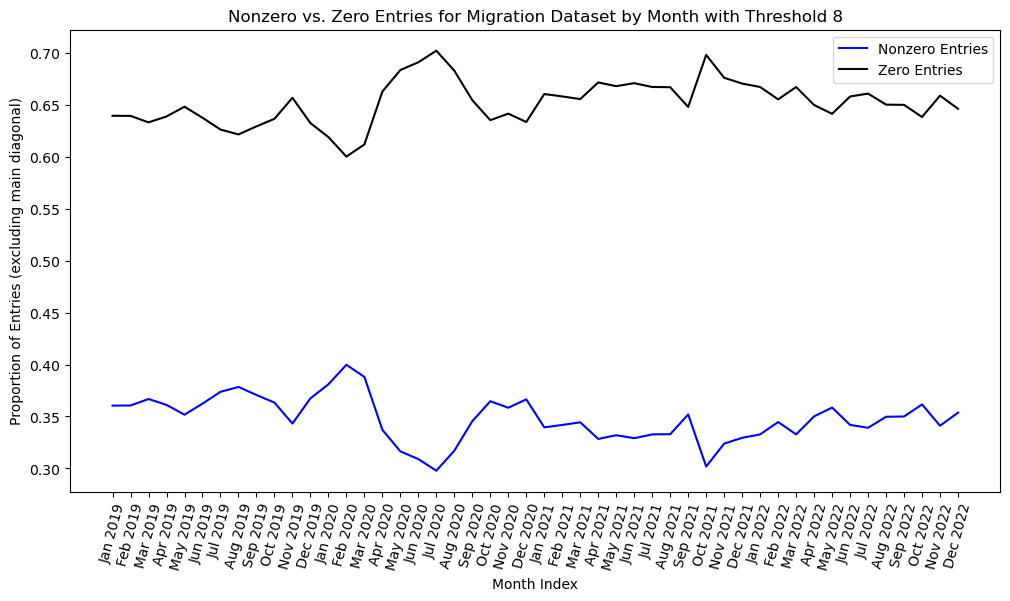

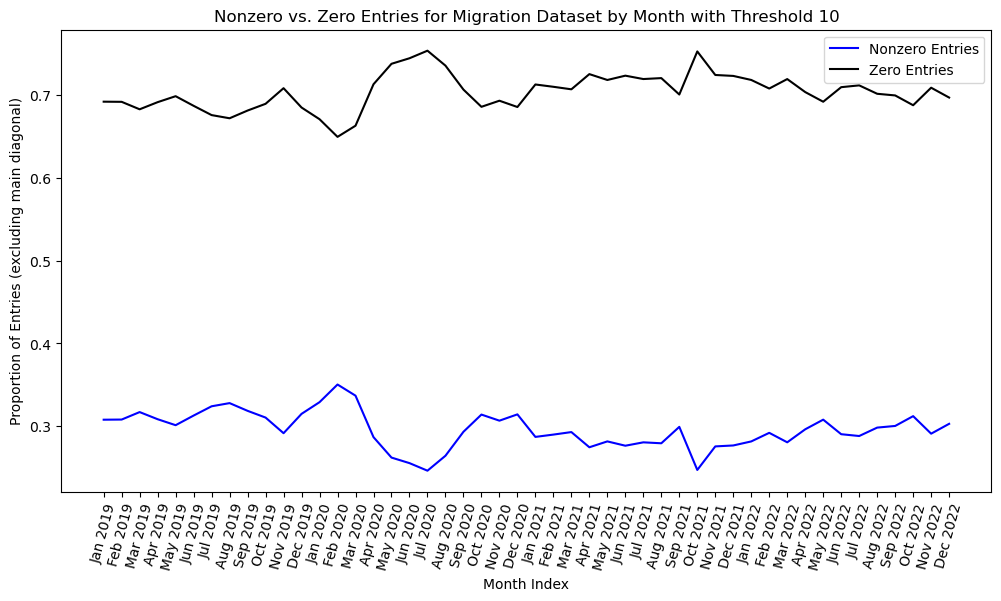

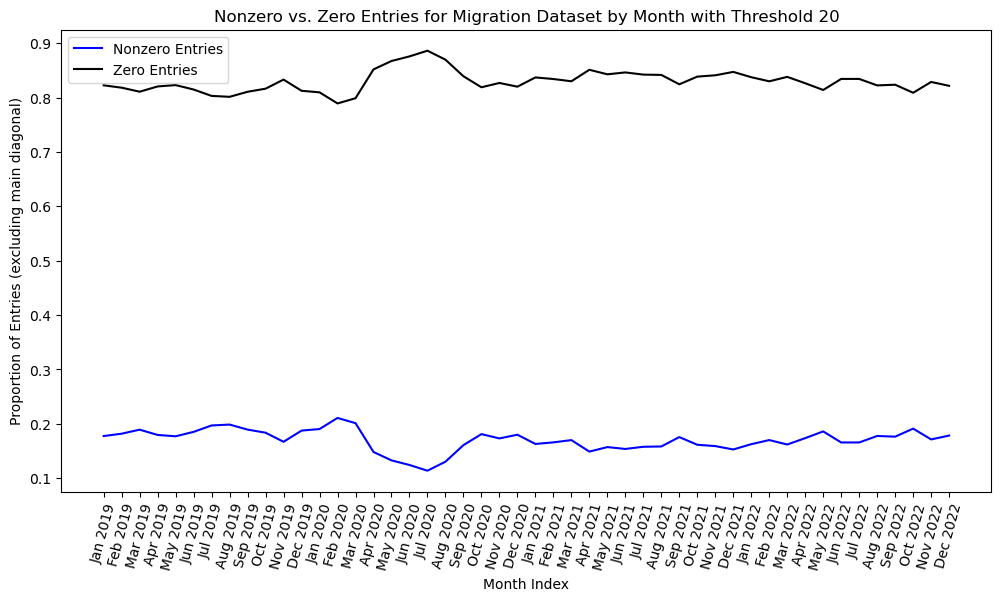

In [10]:
for threshold in [2, 5, 8, 10, 20]:

    thresholdZeroEntries = np.zeros(48)
    thresholdNonzeroEntries = np.zeros(48)

    for monthIndex in range(48):
        monthMatrix = Y[monthIndex]
        monthMatrix[monthMatrix < threshold] = 0

        # Find the number of zero flows (subtracting 181 because no self-loops)
        zeroEntries[monthIndex] = (np.sum(monthMatrix == 0) - 181) / (181 * 180)
        # Find the number of nonzero entries
        nonzeroEntries[monthIndex] = np.count_nonzero(monthMatrix) / (181 * 180)

    months = pd.date_range(start='2019-01-01', end='2022-12-01', freq='MS')
    monthLabels = months.strftime('%b %Y')  # '{short month} {year}', etc.

    plt.figure(figsize=(12, 6))
    plt.plot(monthLabels, nonzeroEntries, label="Nonzero Entries", color="b")
    plt.plot(monthLabels, zeroEntries, label="Zero Entries", color="k")
    plt.xticks(rotation=75)
    plt.xlabel("Month Index")
    plt.ylabel("Proportion of Entries (excluding main diagonal)")
    plt.title(f"Nonzero vs. Zero Entries for Migration Dataset by Month with Threshold {threshold}")
    plt.legend()
    plt.show()

Ending result: We have a method that was conceptually build to work with sparse adjacency matrices